<a href="https://colab.research.google.com/github/amsalugetasew/Deployed_Models/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [93]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [96]:
salary_data = pd.read_csv("/content/drive/MyDrive/Data/ds_salaries.csv")
salary_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [99]:
def encode_experience_level(val):
  global level
  if val == 'SE':
    level = 1
  if val == 'EN':
      level = 2
  if val == 'MI':
    level = 3
  if val == 'EX':
      level = 4
  return level

def encode_employment_type(val):
  global level
  if val == 'SE':
    level = 1
  if val == 'EN':
      level = 2
  if val == 'MI':
    level = 3
  if val == 'EX':
      level = 4
  return level

def encode_company_size(val):
  global level
  if val == 'SE':
    level = 1
  if val == 'EN':
      level = 2
  if val == 'MI':
    level = 3
  if val == 'EX':
      level = 4
  return level

In [100]:
salary_data['experience_level'] = salary_data['experience_level'].map(encode_experience_level)
salary_data['employment_type'] = salary_data['employment_type'].map(encode_employment_type)
salary_data['company_size'] = salary_data['company_size'].map(encode_company_size)
salary_data['employment_type']

0       1
1       1
2       1
3       1
4       1
       ..
3750    1
3751    1
3752    1
3753    1
3754    1
Name: employment_type, Length: 3755, dtype: int64

In [101]:
# Use LabelEncoder to encode the string column to integers
label_encoder = LabelEncoder()
salary_data['employee_residence'] = label_encoder.fit_transform(salary_data['employee_residence'])
salary_data['job_title'] = label_encoder.fit_transform(salary_data['job_title'])
salary_data['company_location'] = label_encoder.fit_transform(salary_data['company_location'])
salary_data['salary_currency'] = label_encoder.fit_transform(salary_data['salary_currency'])
# Print the resulting DataFrame
print(salary_data['salary_currency'].max())

19


In [102]:
# Assuming 'experience' and 'education' are relevant features for salary prediction
# You should replace them with the actual features in your dataset
features = salary_data[['work_year', 'experience_level','employment_type', 'job_title','employee_residence', 'remote_ratio','company_location', 'company_size','salary_currency','salary_in_usd']]
target = salary_data['salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [103]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Build a simple neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression, no activation function
])

In [105]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [106]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))



Epoch 1/50
94/94 [==============================] - 3s 6ms/step - loss: 560105259008.0000 - mae: 192750.7500 - val_loss: 196538646528.0000 - val_mae: 182447.5312
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 560093134848.0000 - mae: 192720.1562 - val_loss: 196517298176.0000 - val_mae: 182389.5156
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 560049618944.0000 - mae: 192612.3750 - val_loss: 196454301696.0000 - val_mae: 182219.5469
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 559953215488.0000 - mae: 192363.6250 - val_loss: 196332191744.0000 - val_mae: 181887.2344
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 559784329216.0000 - mae: 191924.5781 - val_loss: 196135911424.0000 - val_mae: 181348.7969
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 559524806656.0000 - mae: 191245.7344 - val_loss: 195843620864.0000 - val_mae: 180546.1875
Epoch 7/50
94/94 [==========

In [107]:
joblib.dump(model, "/content/drive/MyDrive/Data/NN.sav")

['/content/drive/MyDrive/Data/NN.sav']

In [108]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()



24/24 [==============================] - 0s 2ms/step


In [109]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 162500431948.17917
R-squared Score: 0.004601344544657104


In [30]:
salary_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# **Preprocessing data to make it to work**

In [41]:
# Shift the middle column to the last
salary_data = salary_data.reindex(columns=['work_year', 'experience_level', 'employment_type','job_title',  'employee_residence', 'remote_ratio', 'company_location', 'company_size','salary_currency','salary_in_usd','salary'])
salary_data.head(2)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_currency,salary_in_usd,salary
0,2023,SE,FT,Principal Data Scientist,ES,100,ES,L,EUR,85847,80000
1,2023,MI,CT,ML Engineer,US,100,US,S,USD,30000,30000


In [42]:
salary_data.shape

(3755, 11)

# **Transforming data in the same data type or make convenent to work for ML**
*For Example the experience Level data is object type/string to regression analysis encoding it to numeric data*

In [63]:
salary_data['experience_level'].unique()
salary_data['salary_currency'].unique()
salary_data['job_title'].unique()
# encode it senior = 1, entry level = 2, medium = 3, and expertis = 4 as show below code

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [69]:
salary_data.dtypes

work_year             int64
experience_level      int64
employment_type       int64
job_title             int64
employee_residence    int64
remote_ratio          int64
company_location      int64
company_size          int64
salary_currency       int64
salary_in_usd         int64
salary                int64
dtype: object

In [95]:
salary_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salary_currency', 'salary_in_usd', 'salary'],
      dtype='object')

In [79]:
salary_data.isnull().value_counts

<bound method DataFrame.value_counts of       work_year  experience_level  employment_type  job_title  \
0         False             False            False      False   
1         False             False            False      False   
2         False             False            False      False   
3         False             False            False      False   
4         False             False            False      False   
...         ...               ...              ...        ...   
3750      False             False            False      False   
3751      False             False            False      False   
3752      False             False            False      False   
3753      False             False            False      False   
3754      False             False            False      False   

      employee_residence  remote_ratio  company_location  company_size  \
0                  False         False             False         False   
1                  False       

In [81]:
# Calculate the number of missing values for each column
missing_values_count = salary_data.isnull().sum()

# Sort columns by the number of missing values in descending order
sorted_columns = missing_values_count.sort_values(ascending=False)

# Display columns and their missing value counts
for column in sorted_columns.index:
    missing_count = missing_values_count[column]
    print(f"Column: {column}, Missing Values: {missing_count}")

Column: work_year, Missing Values: 0
Column: experience_level, Missing Values: 0
Column: employment_type, Missing Values: 0
Column: job_title, Missing Values: 0
Column: employee_residence, Missing Values: 0
Column: remote_ratio, Missing Values: 0
Column: company_location, Missing Values: 0
Column: company_size, Missing Values: 0
Column: salary_currency, Missing Values: 0
Column: salary_in_usd, Missing Values: 0
Column: salary, Missing Values: 0


In [73]:
X = salary_data[salary_data.columns[:-1]]
Y = salary_data[salary_data.columns[-1]]

In [74]:
X.shape
X.head(2)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_currency,salary_in_usd
0,2023,1,1,84,26,100,25,1,7,85847
1,2023,1,1,66,75,100,70,1,19,30000


In [75]:
Y.shape
Y.head(2)

0    80000
1    30000
Name: salary, dtype: int64

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("train size", X_train.shape, Y_train.shape, "Test size", X_test.shape, Y_test.shape)

train size (2628, 10) (2628,) Test size (1127, 10) (1127,)


In [83]:
X_train['company_location'].unique()
X_train['experience_level'].unique()

array([1])

In [84]:
Linear_regration_model = LinearRegression()

In [85]:
Linear_regration_model.fit(X_train, Y_train)

LinearRegression()

In [92]:
joblib.dump(Linear_regration_model, "/content/drive/MyDrive/Data/salary_prediction.sav")

['/content/drive/MyDrive/Data/salary_prediction.sav']

In [87]:
model_pred = Linear_regration_model.predict(X_test)

In [89]:
# Evaluate the model
mse = mean_squared_error(Y_test, model_pred)
r2 = r2_score(Y_test, model_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')



Mean Squared Error: 986285166991.6713
R-squared Score: 0.012090127613818002


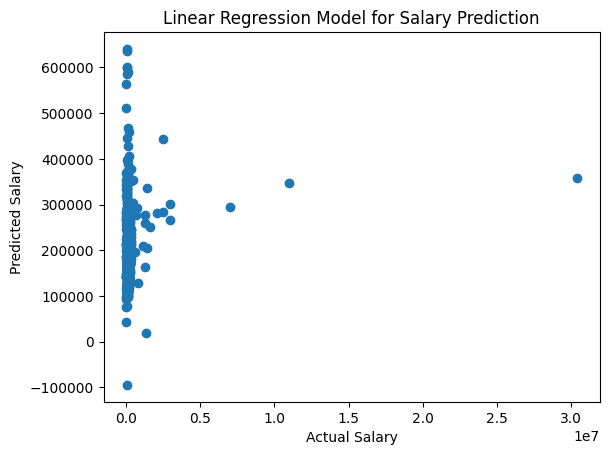

In [90]:
# Visualize the predictions against the actual values
plt.scatter(Y_test, model_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression Model for Salary Prediction')
plt.show()